**Kelvin Fung**<br>
**YSC4216 Machine Learning**<br>
**Assignment 4: Gaussian Process for Regression**

Link to assignment: 

https://tanrobby.github.io/teaching/ync_machine_learning/assignment4.html

1. Generate 50 2D-data points using the following function: $y = sin(x^2 + 1)$
2. Add Gaussian random noise to the data
3. Show original curve line and the noisy data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

%matplotlib inline

In [4]:
# Functions to generate data
def actual_distribution(num_points=50):
    x_act = np.linspace(0, 1, num=num_points)
    y_act = np.sin(np.power(x_act, 2) + 1)
    
    return (x_act, y_act)

def add_noise(y_act, sig=.05):
    mu = 0
    noise = np.random.normal(mu, sig, len(y_act))
    
    return y_act + noise

In [5]:
x_act, y_act = actual_distribution(50)
y_noise = add_noise(y_act, .05)

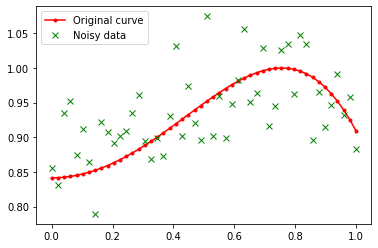

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_act, y_act, '-ro', markersize=3, label='Original curve')
ax.plot(x_act, y_noise, '-gx', linestyle='none', label='Noisy data')
ax.legend()

4. Compute the Gaussian process prediction of every input data sequentially, where each input data is taken randomly from the noise data.
5. Use the kernel we discuss in class (textbook's Eq. (6.63), page 307), by setting thetas: (1.0, 4.0, 0.0, 0.0)

In [ ]:
def gaussian_process(x_act, y_noise, beta, thetas):
    
    # Create array to store order in which data is sampled.
    sampling_order = [x for x in range(50)]
    np.random.shuffle(sampling_order)
    
    # Initilise variables to store predicted values and associated s.d.
    y_est_lst = []
    s_lst = []
    
    # Define kernel function
    def k(xi, xj):
        return thetas[0] + np.exp((-thetas[1]/2) * linalg.norm(xi-xj)**2) + thetas[2] + \
               (thetas[3] * (xi.T * xj)[0])
        
    # Functions to compute k_star and C_n
    def compute_k_star(x_star, x_train, kernel_func):
        return np.matrix([kernel_func(x, x_star) for x in x_train]).T
    
    def compute_C_N(x_train, kernel_func, beta):
        N = len(x_train)
        C = np.zeros((N, N))
        
        for i, x in enumerate(x_train):
            C[i, i] = kernel_func(x, x) + (1/beta)
            
            for j in range(i, N):
                C[i, j] = kernel_func(x, x_train[j])
                C[j, i] = C[i, j]
                
    def compute_c_star(x_star, kernel_func, beta):
        return kernel_func(x_star, x_star) + (1/beta)
    
    # Insert data one at a time and compute estimated y and s.d.
    x_train = []
    
    for index in sampling_order:
        x_train.append(x_act[index])
        
        y_est = []
        sd = []
        
        C_N = compute_C_N(x_train, k, beta)
        #t_N = np.matrix()

    pass    
        
        
        

In [1]:
thetas = [1, 4, 0, 0]
def kernel_function(xi, xj):
        return thetas[0] + np.exp((-thetas[1]/2) * linalg.norm(xi-xj)**2) + thetas[2] + \
               (thetas[3] * (xi.T * xj)[0])

In [14]:
kernel_function(np.array([0.5]), np.array([0.7]))

1.9231163463866359